LFD Final <br>
Deniz Topal 150230730 <br>
https://github.com/Deniztpl/LFD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

I have built two functions to generate datasets and plot them:
- generate_dataset(): Generates 100 points for each class. Classes labeled as 0 and 1s. The positions are randomly assigned around given center points given as arguments.
- plot_SVM: Plots trained SVMs including margins, decision boundry and the datasets.

In [2]:
np.random.seed(0)

In [3]:
def generate_dataset(center):
    """Generate random dataset with respect to given tuple."""
    X = np.zeros((200, 2))
    y = np.zeros(200)

    X[:100, 0] = np.random.normal(center[0], 1, 100)
    X[:100, 1] = np.random.normal(center[0], 1, 100)
    y[:100] = 0

    X[100:, 0] = np.random.normal(center[1], 1, 100)
    X[100:, 1] = np.random.normal(center[1], 1, 100)
    y[100:] = 1

    dataset = np.column_stack((X, y))
    return dataset

In [4]:
def plot_SVM(svm, X, y, cmap, dataset_name):
    """Plot SVM's boundries and margins on dataset."""
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx) # Use meshgrid to draw
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    # Decision boundtry Z
    Z = svm.decision_function(xy).reshape(XX.shape)

    # Draw decision boundry and its margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               linestyles=['--', '-', '--'])

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f"SVM Decision Boundary on {dataset_name}")
    plt.show()

# Q.4

Two new datasets having shapes of (200,3) generated using function generate_dataset(). The first two columns are feature columns and the last column is label column. The tuples given as center positions are tuned to make D1 linearly seperable and to make D2 not seperable.

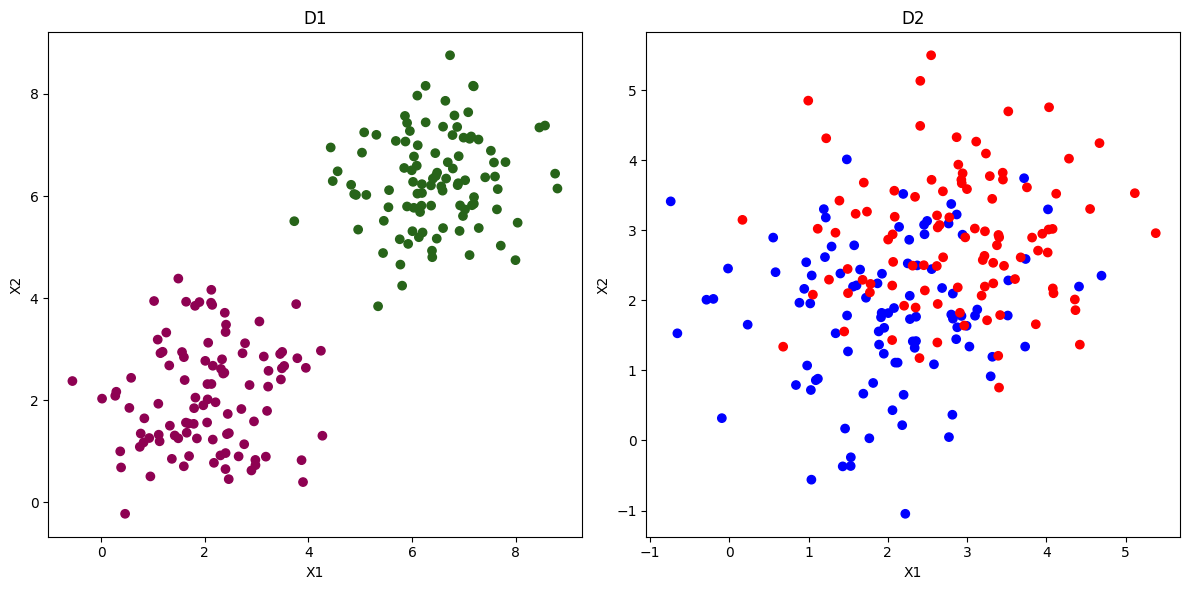

In [5]:
# Generate D1
D1 = generate_dataset(center=(2, 6.5))

# Generate D2
D2 = generate_dataset(center=(2,3))
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot D1
axes[0].scatter(D1[:, 0], D1[:, 1], c=D1[:, 2], cmap='PiYG')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].set_title('D1')

# Plot D2
axes[1].scatter(D2[:, 0], D2[:, 1], c=D2[:, 2], cmap='bwr')
axes[1].set_xlabel('X1')
axes[1].set_ylabel('X2')
axes[1].set_title('D2')

plt.tight_layout()
plt.show()

# Q.5 & Q.6

After plotting datasets, I split datasets into train and test sets with percentage of test set as %10. Then I trained two SVM model for each dataset: hard-margin SVM for D1 and soft-margin SVM for D2. To make hard-margin SVM in D1, I assigned C as a very large number to make SVM look for widest margin. In contrast, C is assigned to 1 (most ued number for soft-margin SVMs) to make model error-tolerant in D1. Even though the dataset D1 is not linearly seperable, the model succesfully worked without major errors. 

After initialization, the models are trained on train set and plotted with plot_SVM() function. At the last step the models predicted y_pred with x_test. Resulting y_pred is compared with y_test and the results are stored to variables to print them later.

In [6]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    D1[:,:2], D1[:,2], test_size=0.10, random_state=0)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    D2[:,:2], D2[:,2], test_size=0.10, random_state=0)

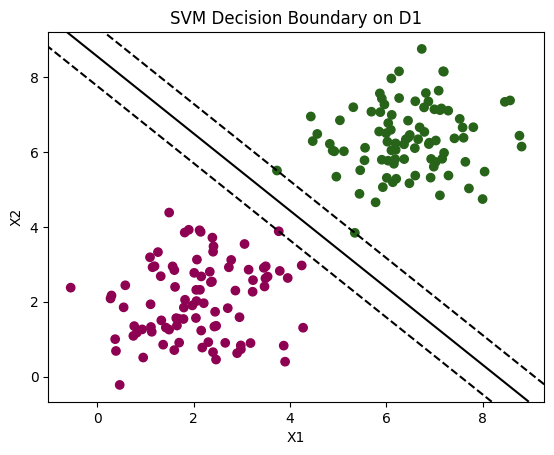

In [7]:
# Train hard-margin SVM on D1
svm1 = SVC(kernel='linear', C=1e10)
svm1.fit(X_train1, y_train1)
plot_SVM(svm1, X_train1, y_train1, cmap='PiYG', dataset_name="D1")
y_pred1 = svm1.predict(X_test1)
accuracy_svm1 = accuracy_score(y_pred1, y_test1)

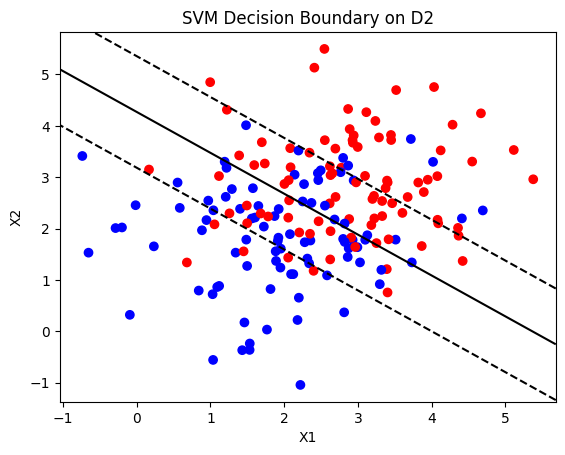

In [8]:
# Train soft-margin SVM on D2
svm2 = SVC(kernel='linear', C=1)
svm2.fit(X_train2, y_train2)
plot_SVM(svm2, X_train2, y_train2, cmap='bwr', dataset_name="D2")
y_pred2 = svm2.predict(X_test2)
accuracy_svm2 = accuracy_score(y_pred2, y_test2)

# Q.7

Multilayer Perceptrons are another alternative to SVMs. To try on the datasets I have imported MLPClassifier from sklearn library. I have given 2 hidden layers with 10 perceptrons and passed these specifications as arguments. Then I trained the data on trainset, predicted values and compared with test set. Resulting accuracies are stored again.

In [9]:
# MLP on D1
mlp1 = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=0)
mlp1.fit(X_train1, y_train1)
y_pred1 = mlp1.predict(X_test1)
accuracy_mlp1 = accuracy_score(y_pred1, y_test1)

In [10]:
# MLP on D2
mlp2 = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=0)
mlp2.fit(X_train2, y_train2)
y_pred1 = mlp2.predict(X_test1)
accuracy_mlp2 = accuracy_score(y_pred1, y_test1)

In [11]:
print(f"Accuracy of SVM on D1: {accuracy_svm1:.2f}")
print(f"Accuracy of SVM on D2: {accuracy_svm2:.2f}\n")
print(f"Accuracy of MLP on D1: {accuracy_mlp1:.2f}")
print(f"Accuracy of MLP on D2: {accuracy_mlp2:.2f}")

Accuracy of SVM on D1: 1.00
Accuracy of SVM on D2: 0.80

Accuracy of MLP on D1: 1.00
Accuracy of MLP on D2: 0.75


The SVM has 100% accuracy on D1 because the dataset D1 is very seperated and hard-margin is successful in this case. Even though the second dataset looks hard for developing a model owing to the fact that data is very noisy and complex, the soft-margin SVM had success rate of 80%. While MLP is considered to be a best model for many situation, here the SVM is sligthly better. The reason might be the fact that the MLPs, being neural networks, can be more sensitive to noise and require more data to generalize well. The dataset of 200 is a simple problem for MLPs and the nature of SVMs is better suited for the situation here.